In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [287]:
# Load the dataset
df=pd.read_csv('parkinsons.csv')
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


- There are a total of 24 columns. In these, 'name' column can be omitted.
- The 'status' column is the target variable and remaining are attributes.

### Exploratory Data Analysis of the given dataset

In [288]:
df.shape

(195, 24)

In [289]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [290]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

- All the attributes are float type. So, no need of any encoding of attributes.

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [292]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

- All the attributes are filled and there are no null values in the dataset.

In [293]:
df.values

array([['phon_R01_S01_1', 119.992, 157.302, ..., 0.266482, 2.301442,
        0.284654],
       ['phon_R01_S01_2', 122.4, 148.65, ..., 0.33559, 2.486855,
        0.368674],
       ['phon_R01_S01_3', 116.682, 131.111, ..., 0.311173, 2.342259,
        0.332634],
       ...,
       ['phon_R01_S50_4', 174.688, 240.005, ..., 0.158453, 2.679772,
        0.131728],
       ['phon_R01_S50_5', 198.764, 396.961, ..., 0.207454, 2.138608,
        0.123306],
       ['phon_R01_S50_6', 214.289, 260.277, ..., 0.190667, 2.555477,
        0.148569]], dtype=object)

In [294]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [295]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [381]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\salma\AppData\Local\Temp\ipykernel_66392\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


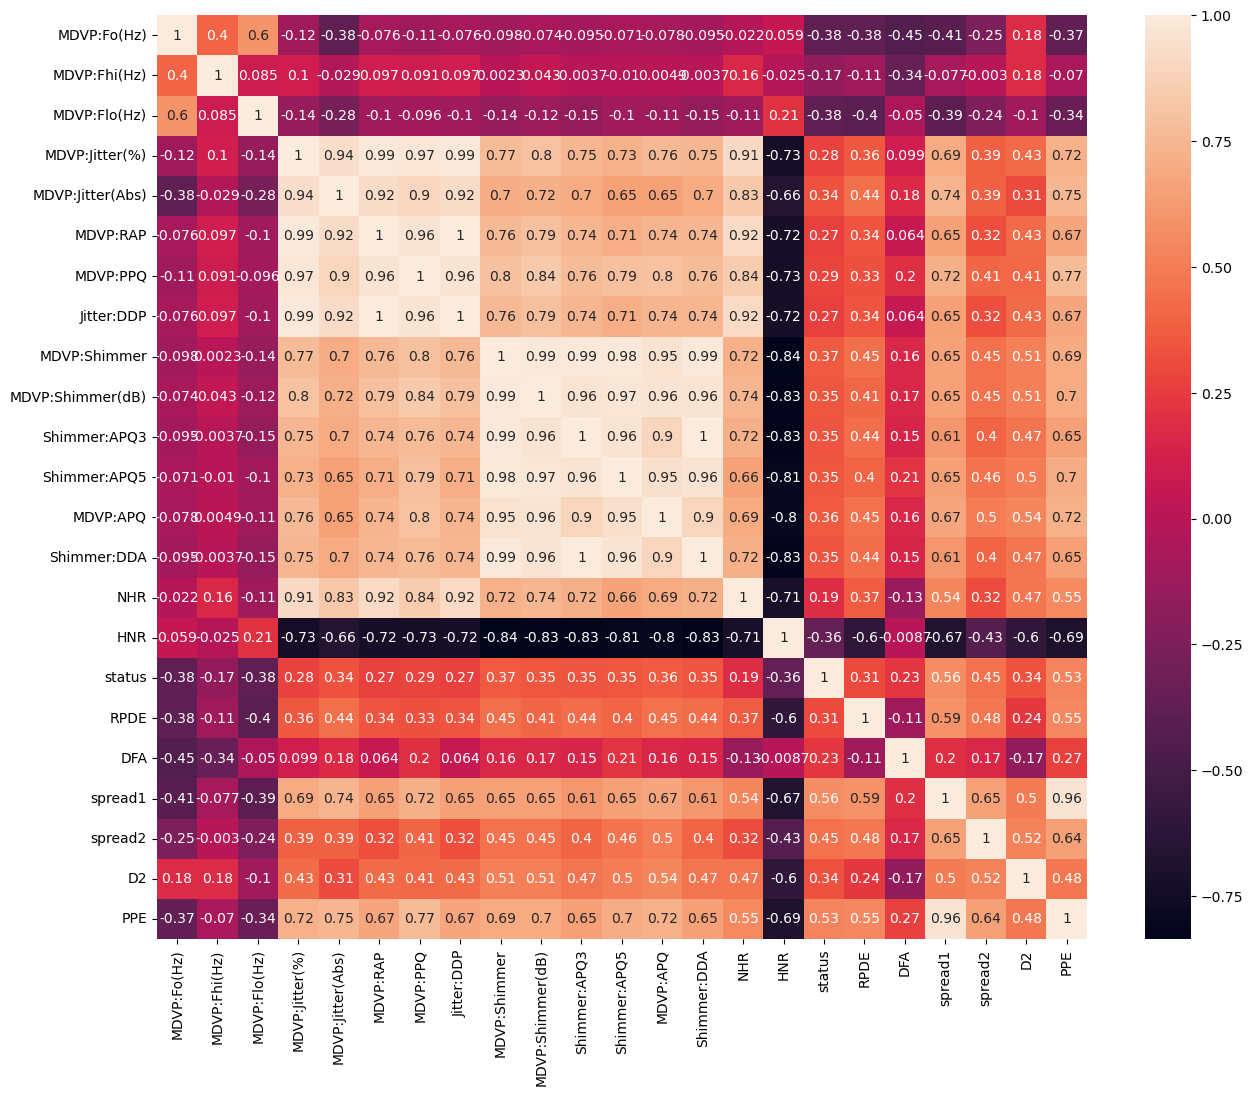

In [384]:
plt.figure(figsize=(15, 12))  
sns.heatmap(correlation_matrix,annot=True)
plt.show()

- Attributes which look normally distributed are HNR,RPDE,DFA spread1,Spread2,D2
- Some of the attributes (as all MDVP based) look like they may have an exponential distribution
- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. 
- We can observe that the correlation very low in most cases
- Among certain attributes, the  'status' is greatly correlated 
- Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
- Closer to 0 means not very strongly correlated. variables with strong correl

In [298]:
# seperating label column from the dataset
df_feat=df.drop(labels=['name','status'],axis=1)
df_label=df['status']

In [385]:
df_label.value_counts()

1    147
0     48
Name: status, dtype: int64

- The health status of the subjects is denoted in the 'status' column.
- '1' indicates Parkinson's disease, while '0' represents a healthy status.

In [299]:
df_feat.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [300]:
df_label.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### Feature scaling

In [301]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df_feat)

In [302]:
X=np.array(df_scaled)
y=np.array(df_label)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

- Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

### Training with different Classification algorithms

### Logistic Regression

In [304]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [305]:
log_pred = log_classifier.predict(X_test)
log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [306]:
log_accuracy = accuracy_score(y_test,log_pred)
log_accuracy

0.7966101694915254

In [307]:
log_report = classification_report(y_test,log_pred)
print(log_report)

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.77      1.00      0.87        40

    accuracy                           0.80        59
   macro avg       0.88      0.68      0.70        59
weighted avg       0.84      0.80      0.76        59



In [308]:
log_cm = confusion_matrix(y_test,log_pred)
log_cm

array([[ 7, 12],
       [ 0, 40]], dtype=int64)

Model Scoring
1. Accuracy :: 80%

2. Re-call :: 100%

3. Precision :: 77%

4. F1-Score :: 87%

### KNN 

In [309]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [310]:
myList = list(range(3,40,2))
ac_scores = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    scores = f1_score(y_test, y_pred)
    ac_scores.append(scores)

In [311]:
MSE = [1 - x for x in ac_scores]

optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [312]:
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [313]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [314]:
knn_accuracy = accuracy_score(y_test,knn_pred)
knn_accuracy

0.8983050847457628

In [315]:
knn_report = classification_report(y_test,knn_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.87      1.00      0.93        40

    accuracy                           0.90        59
   macro avg       0.93      0.84      0.87        59
weighted avg       0.91      0.90      0.89        59



In [316]:
knn_cm = confusion_matrix(y_test,knn_pred)
knn_cm

array([[13,  6],
       [ 0, 40]], dtype=int64)

Model Scoring
1. Accuracy :: 90%

2. Re-call :: 100%

3. Precision :: 87%

4. F1-Score :: 93%

### Naive Bayes

In [317]:
from sklearn.naive_bayes import GaussianNB
nb_classfier=GaussianNB()
nb_classfier.fit(X_train,y_train)

GaussianNB()

In [318]:
nb_classfier.score(X_train , y_train)

0.7205882352941176

In [319]:
nb_classfier.score(X_test, y_test)

0.6779661016949152

In [320]:
nb_pred = nb_classfier.predict(X_test)
nb_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [321]:
nb_accuracy = accuracy_score(y_test,nb_pred)
nb_accuracy

0.6779661016949152

In [322]:
nb_report = classification_report(y_test,nb_pred)
print(nb_report)

              precision    recall  f1-score   support

           0       0.50      0.84      0.63        19
           1       0.89      0.60      0.72        40

    accuracy                           0.68        59
   macro avg       0.69      0.72      0.67        59
weighted avg       0.76      0.68      0.69        59



In [323]:
nb_cm = confusion_matrix(y_test,nb_pred)
nb_cm

array([[16,  3],
       [16, 24]], dtype=int64)

Model Scoring
1. Accuracy :: 68%

2. Re-call :: 60%

3. Precision :: 89%

4. F1-Score :: 72%

### SVM

In [324]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train , y_train)

SVC()

In [325]:
svc_classifier.score(X_train , y_train)

0.9044117647058824

In [326]:
svc_classifier.score(X_test, y_test)

0.7966101694915254

In [327]:
svc_pred = svc_classifier.predict(X_test)
svc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [328]:
svc_accuracy = accuracy_score(y_test,svc_pred)
svc_accuracy

0.7966101694915254

In [329]:
svc_report = classification_report(y_test,svc_pred)
print(svc_report)

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.77      1.00      0.87        40

    accuracy                           0.80        59
   macro avg       0.88      0.68      0.70        59
weighted avg       0.84      0.80      0.76        59



In [330]:
svc_cm = confusion_matrix(y_test,svc_pred)
svc_cm

array([[ 7, 12],
       [ 0, 40]], dtype=int64)

Model Scoring
1. Accuracy :: 80%

2. Re-call :: 100%

3. Precision :: 77%

4. F1-Score :: 87%

### Decision Tree

In [331]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [332]:
dt_classifier.score(X_train , y_train)

1.0

In [333]:
dt_classifier.score(X_test, y_test)

0.8983050847457628

In [334]:
y_pred = dt_classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [335]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [336]:
dt_accuracy = accuracy_score(y_test,y_pred)
dt_accuracy

0.8983050847457628

In [337]:
dt_report = classification_report(y_test,y_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



In [338]:
dt_cm = confusion_matrix(y_test,y_pred)
dt_cm

array([[14,  5],
       [ 1, 39]], dtype=int64)

In [339]:
dt_classifier1 = DecisionTreeClassifier(criterion='entropy', max_depth = 10)
dt_classifier1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [340]:
dt_classifier1.score(X_train , y_train)

1.0

In [341]:
dt_classifier1.score(X_test, y_test)

0.8983050847457628

In [342]:
y_pred1 = dt_classifier1.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [343]:
dt_accuracy1 = accuracy_score(y_test,y_pred1)
dt_accuracy1

0.8983050847457628

In [344]:
dt_report1 = classification_report(y_test,y_pred1)
print(dt_report1)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



In [345]:
dt_cm1 = confusion_matrix(y_test,y_pred1)
dt_cm1

array([[14,  5],
       [ 1, 39]], dtype=int64)

Model Scoring
1. Accuracy :: 86%

2. Re-call :: 97%

3. Precision :: 85%

4. F1-Score :: 91%

### Random Forest

In [346]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [347]:
rf_classifier.score(X_train,y_train)

1.0

In [348]:
rf_classifier.score(X_test,y_test)

0.847457627118644

In [349]:
rf_pred = rf_classifier.predict(X_test)
rf_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [350]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

0.847457627118644

In [351]:
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



In [352]:
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm

array([[11,  8],
       [ 1, 39]], dtype=int64)

In [374]:
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_pred)
roc_auc_ada = metrics.auc(fpr, tpr)
print("AUC : % 1.4f" %(roc_auc_ada)) 

AUC :  0.7770


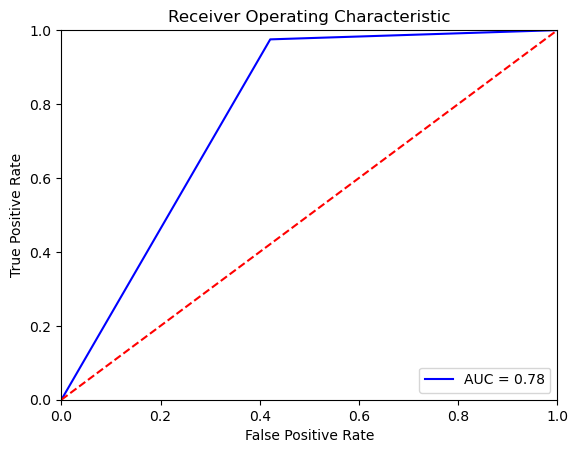

In [375]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Scoring
1. Accuracy :: 84%

2. Re-call :: 97%

3. Precision :: 83%

4. F1-Score :: 90%

5. ROC-AUC :: 77%

### AdaBoost

In [353]:
from sklearn.ensemble import AdaBoostClassifier
ab_classifier=AdaBoostClassifier(n_estimators=50, learning_rate=0.8, random_state=0)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.8, random_state=0)

In [354]:
ab_classifier.score(X_train,y_train)

1.0

In [355]:
ab_classifier.score(X_test, y_test)

0.9152542372881356

In [356]:
ab_pred = ab_classifier.predict(X_test)
ab_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [357]:
ab_accuracy = accuracy_score(y_test,ab_pred)
ab_accuracy

0.9152542372881356

In [358]:
ab_report = classification_report(y_test, ab_pred)
print(ab_report)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.91      0.97      0.94        40

    accuracy                           0.92        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.92      0.92      0.91        59



In [359]:
ab_cm = confusion_matrix(y_test, ab_pred)
ab_cm

array([[15,  4],
       [ 1, 39]], dtype=int64)

In [372]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, ab_pred)
roc_auc_ada = metrics.auc(fpr, tpr)
print("AUC : % 1.4f" %(roc_auc_ada)) 

AUC :  0.8822


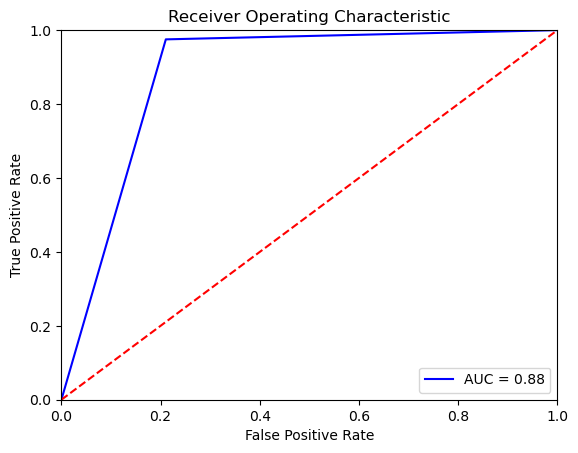

In [373]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Scoring
1. Accuracy :: 91%

2. Re-call :: 97%

3. Precision :: 91%

4. F1-Score :: 94%

5. ROC-AUC :: 88%

### Gradient Boost

In [360]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=0)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=0)

In [361]:
gb_classifier.score(X_train , y_train)

1.0

In [362]:
gb_classifier.score(X_test, y_test)

0.8813559322033898

In [363]:
gb_pred = gb_classifier.predict(X_test)
gb_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [364]:
gb_accuracy = accuracy_score(y_test,gb_pred)
gb_accuracy

0.8813559322033898

In [370]:
gb_report = classification_report(y_test,gb_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



In [366]:
gb_cm = confusion_matrix(y_test,gb_pred)
gb_cm

array([[12,  7],
       [ 0, 40]], dtype=int64)

In [376]:
fpr, tpr, threshold = metrics.roc_curve(y_test, gb_pred)
roc_auc_ada = metrics.auc(fpr, tpr)
print("AUC : % 1.4f" %(roc_auc_ada)) 

AUC :  0.8158


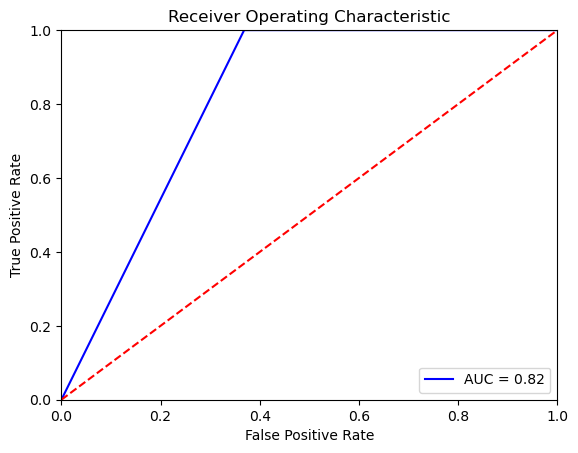

In [377]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [367]:
from sklearn.model_selection import GridSearchCV
grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':np.arange(100,500,100),'max_depth':[2,3,4,5,6,7] }

In [368]:
gb_cv = GridSearchCV(gb_classifier, grid, cv = 4)
gb_cv.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  n_estimators=500,
                                                  random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': array([100, 200, 300, 400])})

In [369]:
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400}
Train Score: 0.9117647058823529
Test Score: 0.8983050847457628


Model Scoring
1. Accuracy :: 89%

2. Re-call :: 100%

3. Precision :: 85%

4. F1-Score :: 92%

5. ROC-AUC :: 82%

### Compare all the models

In [270]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('Decision Tree',DecisionTreeClassifier(criterion='entropy')))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100, random_state = 42)))
models.append(('Adaptive Boosting', AdaBoostClassifier(n_estimators=50, learning_rate=0.8, random_state=0)))
models.append(('Gradient Boosting',GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=0)))

In [392]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s : Accuracy = %f" % (name, cv_results.mean()))

Logistic Regression : Accuracy = 0.859341
K-NN : Accuracy = 0.919780
Naive Bayes : Accuracy = 0.699451
SVM : Accuracy = 0.873626
Decision Tree : Accuracy = 0.874176
Random Forest : Accuracy = 0.889011
Adaptive Boosting : Accuracy = 0.891209
Gradient Boosting : Accuracy = 0.904396


[Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'K-NN'),
 Text(3, 0, 'Naive Bayes'),
 Text(4, 0, 'SVM'),
 Text(5, 0, 'Decision Tree'),
 Text(6, 0, 'Random Forest'),
 Text(7, 0, 'Adaptive Boosting'),
 Text(8, 0, 'Gradient Boosting')]

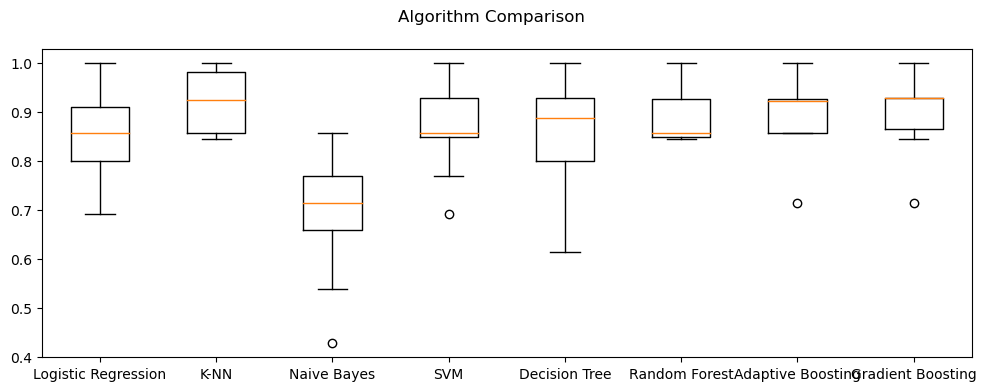

In [277]:
fig = plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

#### Accuracy
1. Logistic Regression : Accuracy = 0.859341
2. K-NN : Accuracy = 0.919780
3. Naive Bayes : Accuracy = 0.699451
4. SVM : Accuracy = 0.873626
5. Decision Tree : Accuracy = 0.874176
6. Random Forest : Accuracy = 0.889011
7. Adaptive Boosting : Accuracy = 0.891209
8. Gradient Boosting : Accuracy = 0.904396